# Exploratory Data Analysis and Business Insights

In [137]:
import os
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()
sns.set_theme(rc = {'figure.figsize':(15,8)}, style='whitegrid', palette='Greys_r')

## Creating connection

In [2]:
db_url = os.getenv('DB_URL')
engine = create_engine(db_url)

## EDA

### Fact Orders

In [3]:
df_fo = pd.read_sql('SELECT * FROM fact_orders', con=engine)

In [125]:
display(df_fo.sample(10))

,order_id,customer_id,order_status,purchase_ts,delivered_customer_ts,days_to_deliver,total_price,total_freight_price,unique_customer_id,customer_city,customer_state,total_payment_value,payment_methods,total_reviews,avg_score
48894,67519e1fe10bb3e4a5b416a24f846f8e,f8291e8b8489bfd516ec56628058a810,delivered,2017-06-07,2017-07-03,26.0,15.9,11.85,87da014df37ac571be8a9f6a9129b02c,sao jose do rio preto,SP,27.75,[credit_card],1.0,1.0
71189,5ce6c2a88e2b68d791065155debf44f8,dc238912e54163b9714b4a07ef017a9b,delivered,2018-03-31,2018-04-11,11.0,149.9,18.93,5dc396375991e0b11446f0855bb4b53b,piraju,SP,168.83,[credit_card],1.0,5.0
49128,99e5f0c685ca94e5a1c7134b1898bb1a,fabf206541756ff848d31278960701ac,delivered,2018-08-08,2018-08-13,5.0,29.0,7.46,6c6ff848f6f705ca1235ac80c414f709,sao paulo,SP,38.94,[credit_card],1.0,5.0
76196,0aba4750be63d17b0b841afb6a84a629,1052ae24b3c5acdf4c7f5d4165a11dbf,delivered,2017-11-08,2017-11-14,6.0,199.0,13.52,885f85d419d323a54c3f4645893fe568,timoteo,MG,212.52,[credit_card],1.0,5.0
25860,380bf78bcf690a6955b8f1de575e26ba,0a8189ab957e37ec9490424e8ecf9050,delivered,2017-03-11,2017-03-22,11.0,239.0,15.84,1bb560cf89ba509f0a4feea96c49c9b3,cantagalo,RJ,254.84,[boleto],1.0,5.0
58116,3aae5f4d2c104f1d6f7620143be23d7f,5670e8edb5152237d23bfc18f0c96e72,delivered,2018-04-09,2018-04-12,3.0,94.0,15.42,9e5c0aa8fea0b95101919e8381480c75,sete lagoas,MG,109.42,[credit_card],1.0,5.0
77640,a46f7d82e8993040636ec55fdcc99272,1f12b97b42f31c818d0db045e5cbad20,delivered,2018-03-18,2018-03-22,4.0,89.9,14.71,98f65b8fa9379231a7c62bdd011ee434,muriae,MG,104.61,[credit_card],1.0,4.0
67612,77e30dea9bbb161e9d91918418f4aafa,b71cb835be11fec9d0e0903e4d9acefe,delivered,2017-08-03,2017-08-08,5.0,65.0,12.70,900886a4542c9007300e081b6ce4eca6,canoinhas,SC,77.70,[credit_card],1.0,5.0
6785,a1f12bceaff1b0d9d2a457fca14d1fa1,460d69a7f123395d881d1122d36e0f87,delivered,2017-11-02,2017-11-10,8.0,39.0,12.69,487b4ea515b16a8a3bae87a0c487b438,barueri,SP,51.69,[credit_card],1.0,4.0
82432,70aae84b2facb982a1867a6793603919,5109b8e49bfa15c2481451462d214558,delivered,2018-04-18,2018-05-02,14.0,179.0,19.13,da010535ae63c9fd86077efeadcd5e88,brasilia,DF,198.13,[credit_card],1.0,3.0


### Fact Order Items

In [13]:
df_foi = pd.read_sql('SELECT * FROM fact_order_items', con=engine)

## Business Insights

### 1. # and % of Orders per status

In [134]:
df_1 = pd.read_sql("""
    SELECT DISTINCT order_status, 
      COUNT(DISTINCT order_id) AS total_orders
    FROM fact_orders
    GROUP BY 1 
    ORDER BY 2 DESC
""", con=engine)

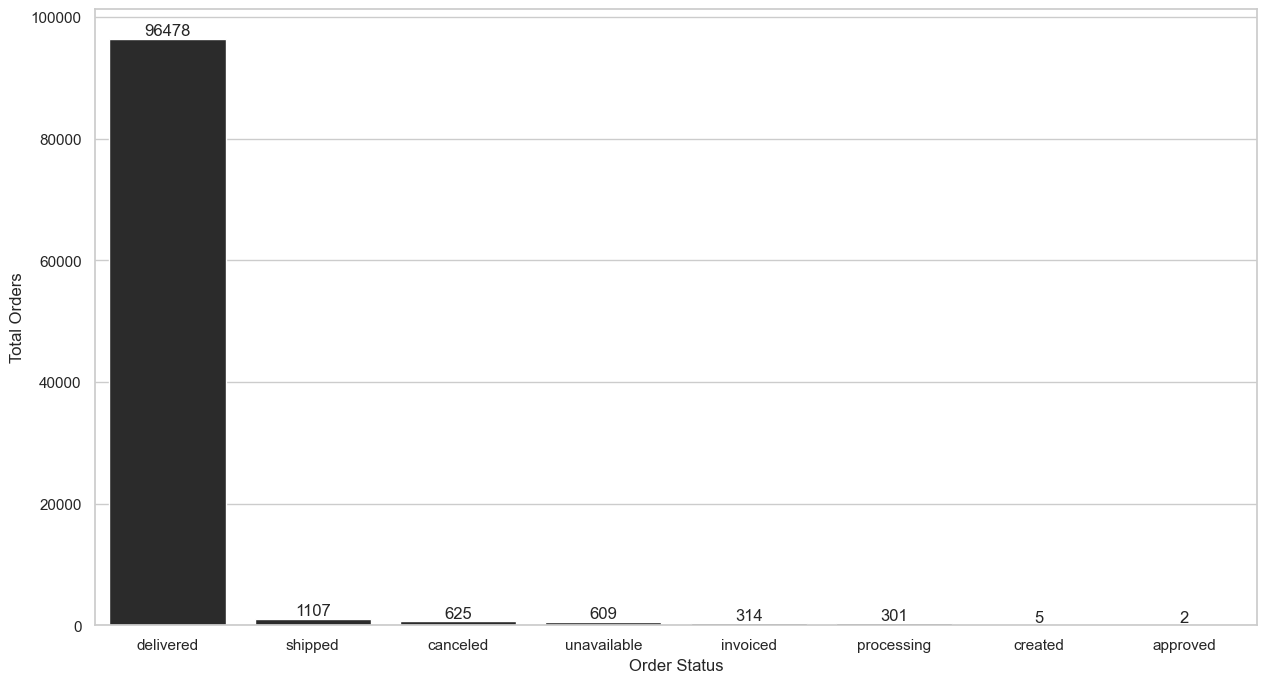

In [138]:
ax = sns.barplot(data=df_1, x='order_status', y='total_orders')
ax.set_xlabel('Order Status')
ax.set_ylabel('Total Orders')
ax.bar_label(ax.containers[0], fontsize=12);

### 2. # of Orders Over Time

In [128]:
df_2 = pd.read_sql("""
    SELECT DISTINCT DATE(DATE_TRUNC('month', purchase_ts)) as dt_ref, 
        COUNT(DISTINCT order_id) as tt_orders
    FROM fact_orders
    GROUP BY 1
    ORDER BY 1 ASC
""", con=engine)

Text(0, 0.5, 'Total Orders')

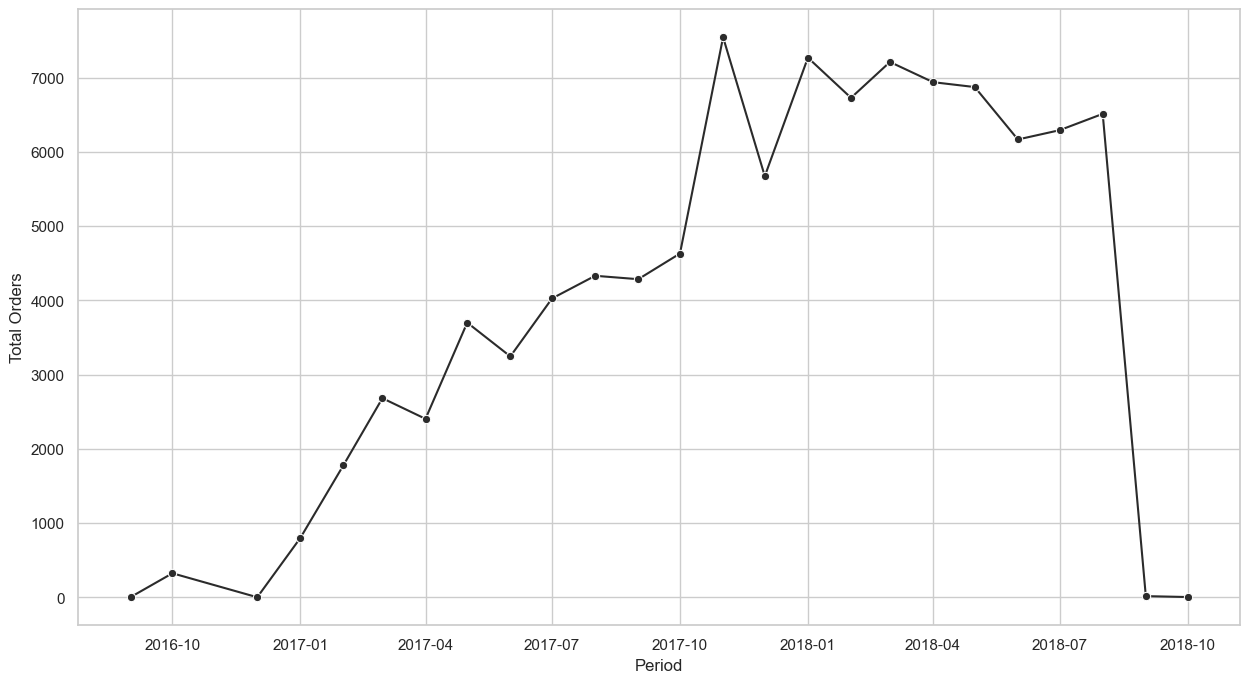

In [140]:
ax = sns.lineplot(data=df_2, x='dt_ref', y='tt_orders', marker='o')
ax.set_xlabel('Period')
ax.set_ylabel('Total Orders')